In [ ]:
!pip install Sastrawi

In [ ]:
import pandas as pd
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk

# Mengunduh resource yang diperlukan dari NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Kamus kontraksi
contractions_dict = {
    "yg": "yang",
    "sjk": "sejak",
    "gk": "gak",
    "km": "kamu",
    "jd": "jadi",
    "dlm": "dalam",
    "tdk": "tidak",
    "krn": "karena",
    "bgt": "banget",
    "sblm": "sebelum",
    "kyak": "kayak",
    "klo": "kalau",
    "kl": "kalau",
    "dah": "sudah",
    "dg": "dengan",
    "gtu" : "gitu",
    "gt" : "gitu",
    "rb": "ribu",
    "dpt" : "dapat",
    "pd" : "pada",
    "pdhl" : "padahal",
    "knp" : "kenapa",
    # Tambahkan kata kontraksi lain yang relevan
}

# Membaca dataset CSV dengan kolom yang sesuai
df = pd.read_csv('komenX.csv')

# Inisialisasi tokenizer, stopwords, dan stemmer
tokenizer = RegexpTokenizer(r'\w+')  # Menghapus tanda baca
stop_words = set(stopwords.words('indonesian'))  # Stopwords bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()  # Stemmer bahasa Indonesia dari Sastrawi

# Fungsi untuk memperbaiki kontraksi
def fix_contractions(text):
    words = text.split()
    fixed_text = []
    for word in words:
        # Cek jika kata ada di kamus kontraksi
        word = contractions_dict.get(word.lower(), word)  # Ganti dengan kata yang benar jika ada di kamus
        fixed_text.append(word)
    return ' '.join(fixed_text)

# Fungsi untuk case folding (mengubah teks menjadi huruf kecil) dan tokenisasi
def case_folding_tokenize(text):
    # Mengubah teks menjadi lowercase dan kemudian tokenisasi
    text_lower = text.lower()
    return tokenizer.tokenize(text_lower)

# Fungsi untuk menghapus stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Fungsi untuk stemming
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

# Memperbaiki kontraksi dan case folding pada kolom Isi Post
df['Isi Post'] = df['Isi Post'].apply(fix_contractions).str.lower()

# Menambahkan kolom tokenization, stop_removal, dan post_stemmed
df['tokenization'] = df['Isi Post'].apply(case_folding_tokenize)
df['stop_removal'] = df['tokenization'].apply(remove_stopwords)
df['post_stemmed'] = df['stop_removal'].apply(stem_tokens)

# Menampilkan hasil akhir
print(df[['Isi Post', 'tokenization', 'stop_removal', 'post_stemmed']])

# Menyimpan dataset yang telah diproses ke file baru (opsional)
df.to_csv('processed_komenX.csv', index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                             Isi Post  \
0   ga mau anjinggg ga mauuuu gueeeee programnya b...   
1   jadi kepikiran kalau program makan siang grati...   
2   sejujurnya, yang gw bingungkan adalah dari sem...   
3   lu ngomong apa sih, kayak yang paling tau prab...   
4   ke mana mana bagi bagi susu, ketika program ma...   
5   at some point (kayanya debat ketiga) tiba2 dia...   
6   atas nama rakyat indonesia, kemarin tanggal 6 ...   
7   makan gratis yang jatahnya rp 10.000 itu ente ...   
8   patuhi amanat konstitusi ini jauh lebih utama ...   
9   tinggal sejarah buat lu, bukan buat anak2 indo...   
10  kaya gini yah makanan nya. coba kasih makan bu...   
11  inilah tipe orang yang ga mau berkembang mauny...   
12  daridulu gue bertanya2, kenapa program ini jad...   
13  gklah, jawaban serius ya ni program makan sian...   
14  mending distop aja kata gue mah. gapapa anjir ...   
15  sayangnya presiden kita dan semua kacungnya be...   
16  makasih tuhan aku gak perlu

In [ ]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv('processed_komenX.csv', usecols=lambda column: 'Unnamed' not in column)


# Menampilkan dataframe
print(df.head())  # Menampilkan 5 baris pertama dari dataframe

     Label                                           Isi Post  \
0  Negatif  ga mau anjinggg ga mauuuu gueeeee programnya b...   
1  Negatif  jadi kepikiran kalau program makan siang grati...   
2  Negatif  sejujurnya, yang gw bingungkan adalah dari sem...   
3  Positif  lu ngomong apa sih, kayak yang paling tau prab...   
4  Negatif  ke mana mana bagi bagi susu, ketika program ma...   

              Akun     Tanggal  \
0       @kodokodar  11/22/2024   
1  @aromapetrikorr    1/7/2025   
2      @PetrolWeeb    1/7/2025   
3     @karim_speak    1/7/2025   
4     @AbanggSayur      6/1/25   

                                        tokenization  \
0  ['ga', 'mau', 'anjinggg', 'ga', 'mauuuu', 'gue...   
1  ['jadi', 'kepikiran', 'kalau', 'program', 'mak...   
2  ['sejujurnya', 'yang', 'gw', 'bingungkan', 'ad...   
3  ['lu', 'ngomong', 'apa', 'sih', 'kayak', 'yang...   
4  ['ke', 'mana', 'mana', 'bagi', 'bagi', 'susu',...   

                                        stop_removal  \
0  ['ga', '

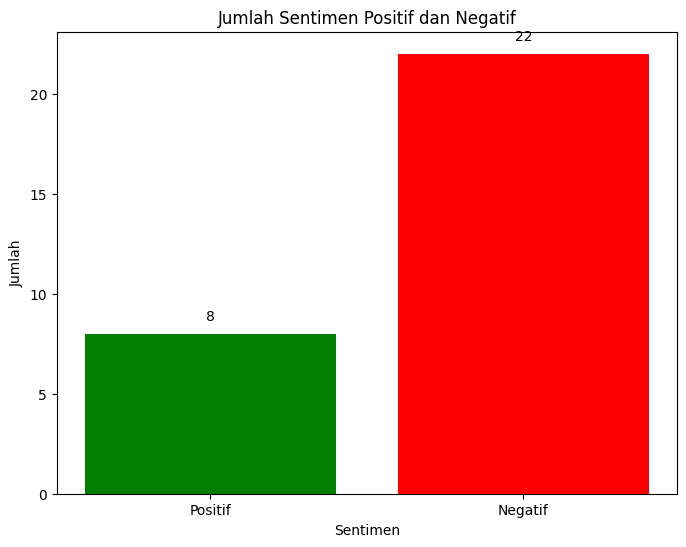

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV yang sudah diproses
df = pd.read_csv('processed_komenX.csv')

# Menghitung jumlah data positif dan negatif
positive_count = df[df['Label'] == 'Positif'].shape[0]
negative_count = df[df['Label'] == 'Negatif'].shape[0]

# Membuat data untuk plot
labels = ['Positif', 'Negatif']
counts = [positive_count, negative_count]
colors = ['green', 'red']

# Membuat plot batang
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)
plt.title('Jumlah Sentimen Positif dan Negatif')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')

# Menampilkan nilai di atas setiap batang
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.show()

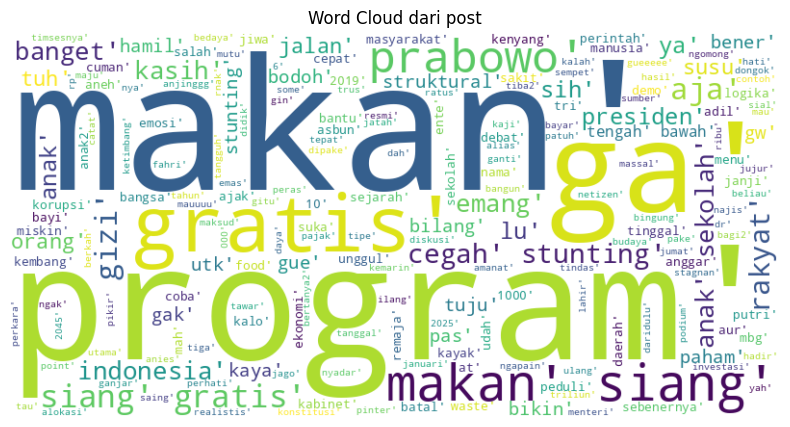

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Menggabungkan semua kata dalam kolom 'post_stemmed'
all_words = ' '.join(df['post_stemmed'].astype(str).values)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari post')
plt.show()

Persentase Sentimen Positif: 26.67%
Persentase Sentimen Negatif: 73.33%


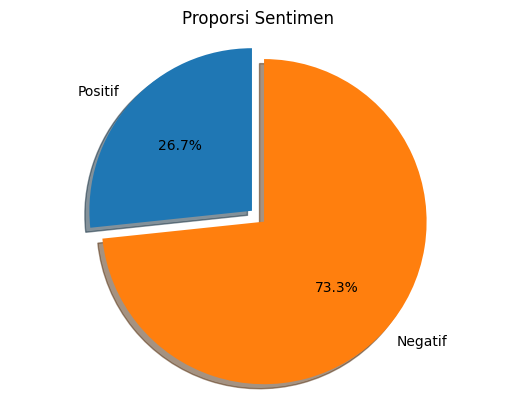

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ... (rest of your code)

# Assuming 'df' is your DataFrame with 'post_stemmed' and 'Label' columns

# ... (your existing code for preprocessing)

# Modelkan hasil data di sini (contoh: analisis sentimen)
def analyze_sentiment(df):
    """
    Menganalisis sentimen dari data yang sudah diproses.

    Args:
        df: DataFrame dengan kolom 'post_stemmed' dan 'Label'.

    Returns:
        Tuple: (positive_percentage, negative_percentage).
    """
    positive_count = df[df['Label'] == 'Positif'].shape[0]
    negative_count = df[df['Label'] == 'Negatif'].shape[0]
    total_count = positive_count + negative_count

    if total_count == 0:
        return 0, 0

    positive_percentage = (positive_count / total_count) * 100
    negative_percentage = (negative_count / total_count) * 100

    return positive_percentage, negative_percentage


positive_percentage, negative_percentage = analyze_sentiment(df)

print(f"Persentase Sentimen Positif: {positive_percentage:.2f}%")
print(f"Persentase Sentimen Negatif: {negative_percentage:.2f}%")

# Contoh visualisasi tambahan (opsional)
labels = ['Positif', 'Negatif']
sizes = [positive_percentage, negative_percentage]
explode = (0.1, 0)  # explode 1st slice
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proporsi Sentimen')
plt.show()

In [ ]:
# prompt: modelkan hasil presisi, recall, f1 scrore, support pada label positif dan negatif, positif sebagai 1, negatif sebagai -1

from sklearn.metrics import classification_report

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
# Replace these with your actual true and predicted labels
# Example:
# y_true = df['Label'].map({'Positif': 1, 'Negatif': -1})
# y_pred = model.predict(X_test) # X_test is your test data

# Example data (replace with your actual data)
y_true = [1, 1, 1, -1, -1, 1, -1, 1, -1, -1]
y_pred = [1, -1, 1, -1, 1, 1, -1, -1, -1, -1]

# Calculate and print the classification report
report = classification_report(y_true, y_pred, labels=[1, -1], target_names=['Positif', 'Negatif'], output_dict=True)

print(classification_report(y_true, y_pred, labels=[1, -1], target_names=['Positif', 'Negatif']))

# Access individual metrics for Positif label
positive_precision = report['Positif']['precision']
positive_recall = report['Positif']['recall']
positive_f1_score = report['Positif']['f1-score']
positive_support = report['Positif']['support']

print("\nMetrics for Positif label:")
print(f"Precision: {positive_precision}")
print(f"Recall: {positive_recall}")
print(f"F1-score: {positive_f1_score}")
print(f"Support: {positive_support}")

# Access individual metrics for Negatif label
negative_precision = report['Negatif']['precision']
negative_recall = report['Negatif']['recall']
negative_f1_score = report['Negatif']['f1-score']
negative_support = report['Negatif']['support']

print("\nMetrics for Negatif label:")
print(f"Precision: {negative_precision}")
print(f"Recall: {negative_recall}")
print(f"F1-score: {negative_f1_score}")
print(f"Support: {negative_support}")

              precision    recall  f1-score   support

     Positif       0.75      0.60      0.67         5
     Negatif       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10


Metrics for Positif label:
Precision: 0.75
Recall: 0.6
F1-score: 0.6666666666666666
Support: 5.0

Metrics for Negatif label:
Precision: 0.6666666666666666
Recall: 0.8
F1-score: 0.7272727272727273
Support: 5.0
